In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import keras.layers as tfl
from tensorflow.python.framework import ops
from Happy_Sign_utils import *


np.random.seed(1)

In [15]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T


In [16]:

def happyModel():
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
        tfl.Conv2D(filters=32, kernel_size=(7, 7), strides=1),
        tfl.BatchNormalization(axis=3),
        tfl.ReLU(),
        tfl.MaxPool2D(),
        tfl.Flatten(),
        tfl.Dense(units=1, activation="sigmoid")
        ])
    
    return model

In [17]:
happy_model = happyModel()

In [18]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [6]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

In [8]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 3s 61ms/step - loss: 1.1825 - accuracy: 0.6750
Epoch 2/10
38/38 [==============================] - 2s 59ms/step - loss: 0.2945 - accuracy: 0.8733
Epoch 3/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1684 - accuracy: 0.9300
Epoch 4/10
38/38 [==============================] - 2s 59ms/step - loss: 0.1142 - accuracy: 0.9600
Epoch 5/10
38/38 [==============================] - 2s 53ms/step - loss: 0.1003 - accuracy: 0.9667
Epoch 6/10
38/38 [==============================] - 2s 65ms/step - loss: 0.1056 - accuracy: 0.9750
Epoch 7/10
38/38 [==============================] - 2s 62ms/step - loss: 0.1290 - accuracy: 0.9517
Epoch 8/10
38/38 [==============================] - 3s 67ms/step - loss: 0.0682 - accuracy: 0.9850
Epoch 9/10
38/38 [==============================] - 3s 75ms/step - loss: 0.0734 - accuracy: 0.9750
Epoch 10/10
38/38 [==============================] - 3s 73ms/step - loss: 0.0543 - accuracy: 0.9850


In [24]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 32ms/step - loss: 0.7227 - accuracy: 0.4400


[0.722683846950531, 0.4399999976158142]

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [7]:
X_train = X_train_orig / 255 
X_test = X_test_orig / 255 

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

Y_train = Y_train.reshape((Y_train.shape[1], Y_train.shape[2]))
Y_test = Y_test.reshape((Y_test.shape[1], Y_test.shape[2]))

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [8]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(filters=8, kernel_size=(4, 4), strides=1, padding="same")(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPooling2D(pool_size=(8, 8), strides=8, padding="same")(A1)

    Z2 = tfl.Conv2D(filters=16, kernel_size=(2, 2), strides=1, padding="same")(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPooling2D(pool_size=(4, 4), strides=4, padding="same")(A2)

    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units=6, activation="softmax")(F)

    model = tf.keras.Model(inputs=input_img, outputs=outputs)

    return model

In [9]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 80ms/step - loss: 1.7964 - accuracy: 0.2389 - val_loss: 1.7780 - val_accuracy: 0.3333
Epoch 2/100
17/17 [==============================] - 1s 66ms/step - loss: 1.7789 - accuracy: 0.2722 - val_loss: 1.7713 - val_accuracy: 0.2750
Epoch 3/100
17/17 [==============================] - 1s 64ms/step - loss: 1.7719 - accuracy: 0.3083 - val_loss: 1.7643 - val_accuracy: 0.3667
Epoch 4/100
17/17 [==============================] - 1s 65ms/step - loss: 1.7653 - accuracy: 0.3556 - val_loss: 1.7573 - val_accuracy: 0.4000
Epoch 5/100
17/17 [==============================] - 1s 66ms/step - loss: 1.7571 - accuracy: 0.3898 - val_loss: 1.7479 - val_accuracy: 0.4583
Epoch 6/100
17/17 [==============================] - 1s 65ms/step - loss: 1.7472 - accuracy: 0.4259 - val_loss: 1.7366 - val_accuracy: 0.4667
Epoch 7/100
17/17 [==============================] - 1s 62ms/step - loss: 1.7347 - accuracy: 0.4472 - val_loss: 1.7220 - val_accuracy: 0.4750
Epoch 

C:\Users\minht\AppData\Local\Temp\ipykernel_24904\974158325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\minht\AppData\Local\Temp\ipykernel_24904\974158325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

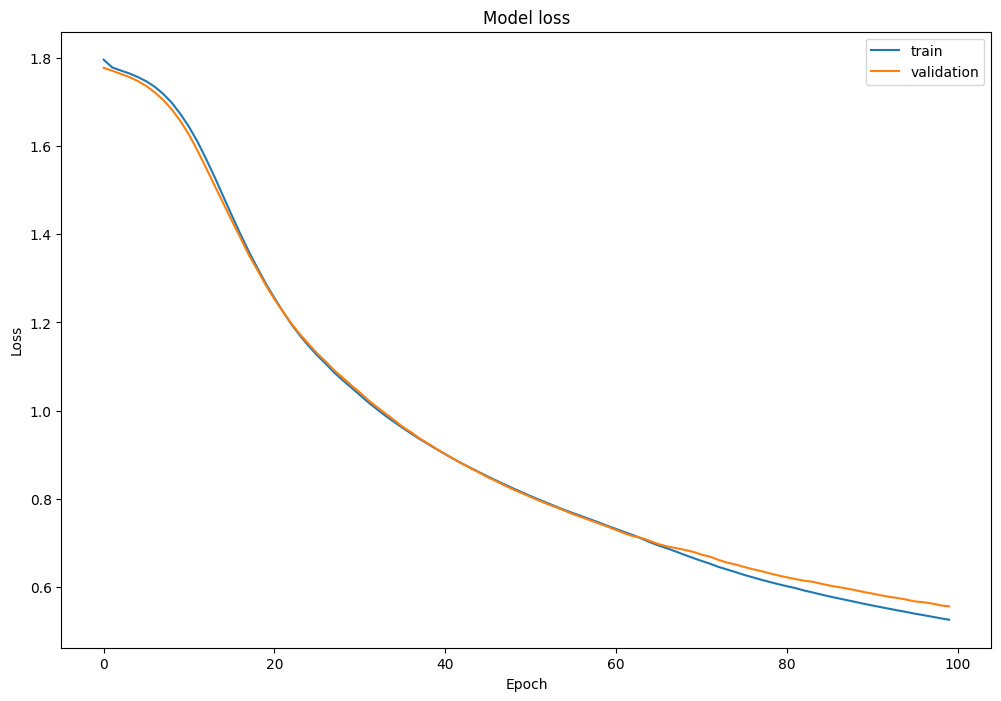

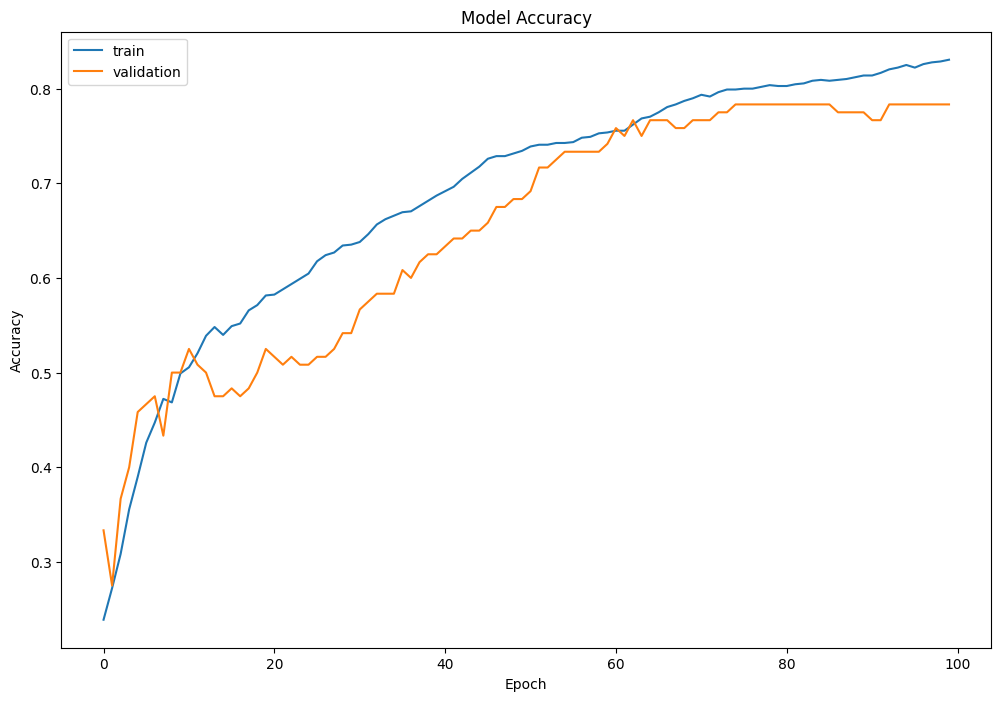

In [11]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [12]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(shape=[None, n_H0, n_W0, n_C0], dtype="float", name="X")
    Y = tf.placeholder(shape=[None, n_y], dtype="float", name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [13]:
def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Note that we will hard code the shape values in the function to make the grading simpler.
    Normally, functions should take values as inputs rather than hard coding.
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer =  tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer =  tf.contrib.layers.xavier_initializer(seed = 0))
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters